<a href="https://www.kaggle.com/code/ashutoshkumarpathak/titanic-ml?scriptVersionId=136299286" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()
#df.keys()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
'''Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')'''
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


> ******let us clean the data

In [4]:
#correlation cofficents to know dependancy of features data on target data 
corr_mat=df.corr()
corr_mat['Survived'].sort_values(ascending=False)


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [5]:
#catagorical data handling
df['Sex'].replace(['male','female'],[1,0],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#catagorical data handling
df['Embarked'].value_counts()
df['Embarked'].replace(['S','C','Q'],[1,2,3],inplace=True)
df['Embarked'].value_counts()
# S    644
# C    168
# Q     77
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0


In [7]:
#declare features of testing data as we don't want all columns

feature=['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
new_train_x=df[feature]
new_train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [8]:
# handling missing values
mean=new_train_x['Age'].mean()
new_train_x['Age'].fillna(mean,inplace=True)
new_train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [9]:
#catagorical data handling
new_train_x['Embarked'].fillna(1,inplace=True)
new_train_x.info()
new_train_x['Embarked'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


1.0    646
2.0    168
3.0     77
Name: Embarked, dtype: int64

In [10]:
#creating dependent variable of label to train for
new_train_y=df['Survived']
new_train_y.value_counts()
new_train_y[0]

0

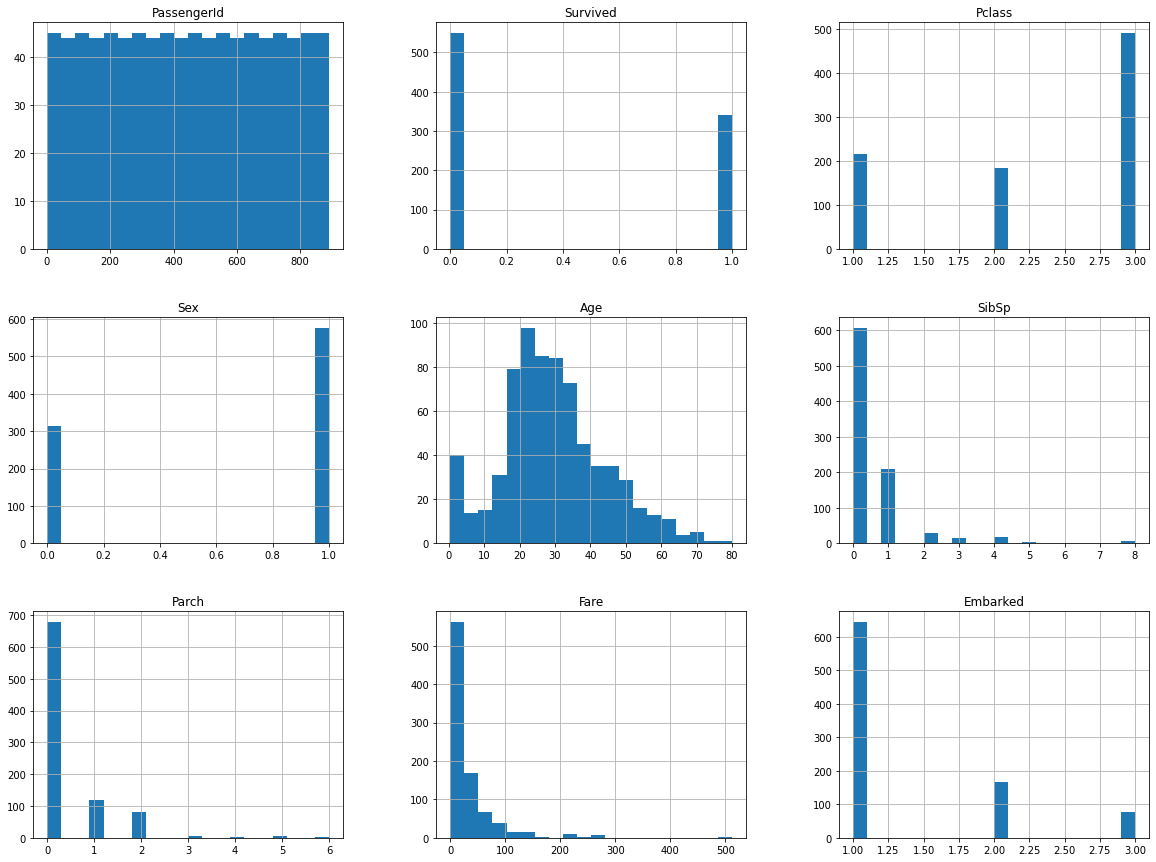

In [11]:
#simple histogram 
import matplotlib.pyplot as plt
df.hist(bins=20,figsize=(20,15))
plt.show()


lets try model


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#model=LinearRegression()
#model=DecisionTreeClassifier(random_state=30)
model=RandomForestClassifier()
model.fit(new_train_x,new_train_y)
k_folds = KFold(n_splits = 10)

scores = cross_val_score(model, new_train_x, new_train_y, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.76666667 0.84269663 0.76404494 0.7752809  0.88764045 0.80898876
 0.79775281 0.78651685 0.85393258 0.83146067]
Average CV Score:  0.811498127340824
Number of CV Scores used in Average:  10


# **lets test our model**

In [13]:
from sklearn.metrics import mean_squared_error
test_x=pd.read_csv('/kaggle/input/titanic/test.csv')
test_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
#catagorical data processing
test_x['Sex'].replace(['male','female'],[1,0],inplace=True)
test_x['Embarked'].replace(['S','C','Q'],[1,2,3],inplace=True)
#test_x["Embarked"]

In [15]:
#declare features of testing data as we don't want all columns
feature1=['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
new_test_x=test_x[feature1]



In [16]:
#filling null values to mean//alternate is use imputer

mean=new_test_x['Age'].mean()
new_test_x['Age'].fillna(mean,inplace=True)

mean=new_test_x['Fare'].mean()
new_test_x['Fare'].fillna(mean,inplace=True)
#new_test_x.info()
new_test_x.head()


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,3
1,893,3,0,47.0,1,0,7.0000,1
2,894,2,1,62.0,0,0,9.6875,3
3,895,3,1,27.0,0,0,8.6625,1
4,896,3,0,22.0,1,1,12.2875,1


In [17]:
#predicted values of model whether they survived or not
pridicted_y=model.predict(new_test_x)
#example lets see for passenger at 0 index in our test case has survived or not 
print('its give value for diffrent feature as per data given',new_test_x.iloc[0])
print('its o/p or predicted value that came out after applying the model is ',pridicted_y[0])


its give value for diffrent feature as per data given PassengerId    892.0000
Pclass           3.0000
Sex              1.0000
Age             34.5000
SibSp            0.0000
Parch            0.0000
Fare             7.8292
Embarked         3.0000
Name: 0, dtype: float64
its o/p or predicted value that came out after applying the model is  0


In [18]:
PassengerId=list(new_test_x['PassengerId'])
Survived_or_not=list(pridicted_y)
list_of_data = list(zip(PassengerId, Survived_or_not))
new_df=pd.DataFrame(list_of_data,columns=['PassengerId','Survived_or_not'])
# new_df.head()
# new_df.tail()


In [19]:
count=new_df['Survived_or_not'].value_counts()
print('total passenger=',len(new_df['PassengerId']))
print('total passenger that died=',count[0])
print('total passenger that survived=',count[1])



total passenger= 418
total passenger that died= 282
total passenger that survived= 136


In [20]:
#Average CV Score:  0.8204619225967541
#sample output
print(new_df.head())
print(new_df.tail())


   PassengerId  Survived_or_not
0          892                0
1          893                0
2          894                0
3          895                0
4          896                0
     PassengerId  Survived_or_not
413         1305                0
414         1306                1
415         1307                0
416         1308                0
417         1309                0


**thank you i hope you like it **